In [1]:
!pip install yahoofinancials
!pip install seaborn
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np

from time import sleep

In [3]:
# Uncomment this to see full table
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
df = pd.read_csv('companies/FIN_all.csv')

In [5]:
df.date = pd.to_datetime(df.date, infer_datetime_format=True).dt.to_period('y')
# df.date = df.date.astype(str)

In [6]:
df

,date,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,operatingIncome,...,depreciation,otherCashflowsFromInvestingActivities,dividendsPaid,changeToInventory,changeToAccountReceivables,otherCashflowsFromFinancingActivities,changeToNetincome,capitalExpenditures,repurchaseOfStock,company
0,2020,3.916600e+10,NaN,27212000000,-1.497000e+09,17483000000,2.632900e+10,94449000000,29811000000,29811000000,...,7.072000e+09,801000000.0,-4.985000e+09,3.840000e+08,-3.185000e+09,-1.010000e+09,7.077000e+09,-4.415000e+09,NaN,ERIBR.HE
1,2019,3.843500e+10,NaN,8762000000,-6.810000e+08,2223000000,2.565800e+10,85161000000,21983000000,21983000000,...,7.080000e+09,-331000000.0,-3.301000e+09,2.610000e+08,1.099500e+10,-1.181000e+09,3.244000e+09,-5.037000e+09,NaN,ERIBR.HE
2,2018,3.736200e+10,NaN,-1463000000,7.920000e+08,-6530000000,2.671100e+10,74138000000,9964000000,9964000000,...,4.662000e+09,-523000000.0,-3.287000e+09,-4.807000e+09,-2.047000e+09,-6.000000e+07,8.630000e+08,-3.975000e+09,NaN,ERIBR.HE
3,2017,3.298000e+10,NaN,-35958000000,6.360000e+08,-32576000000,2.642600e+10,53169000000,-9218000000,-9218000000,...,5.770000e+09,-463000000.0,-3.273000e+09,4.719000e+09,1.379000e+09,6.700000e+07,1.101600e+10,-3.877000e+09,-15000000.0,ERIBR.HE
4,2020,NaN,NaN,1224200000,2.260000e+07,939200000,3.805100e+09,5268000000,1250500000,1250500000,...,2.390000e+08,NaN,-8.805000e+08,NaN,NaN,-6.099000e+08,-8.360000e+07,-8.800000e+07,NaN,KNEBV.HE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2017,NaN,NaN,-1030000,1.000000e+03,-579000,1.192600e+07,20092000,-221000,-221000,...,1.508000e+06,1000.0,NaN,NaN,NaN,1.000000e+05,1.545000e+06,-5.278000e+06,NaN,ENEDO.HE
683,2020,NaN,NaN,-4116634,NaN,-4121611,4.021657e+06,3179648,-3332714,-3332714,...,3.377790e+05,NaN,NaN,3.870000e+04,-3.009000e+05,NaN,9.010150e+05,NaN,NaN,NXTMHN0121.HE
684,2019,NaN,NaN,-6776913,NaN,-6782636,5.171905e+06,2343573,-6517446,-6517446,...,4.877250e+05,NaN,NaN,-2.263000e+05,6.550000e+04,NaN,-6.913620e+05,-8.433000e+05,NaN,NXTMHN0121.HE
685,2018,NaN,NaN,-6152589,NaN,-6154315,4.410803e+06,2023224,-6315633,-6315633,...,3.889170e+05,NaN,NaN,1.283000e+05,7.030000e+05,-1.000000e+02,-1.183682e+06,-6.108000e+05,NaN,NXTMHN0121.HE


<h2>Dept/Equity ratio</h2>

- How much debt for every dollar of equity
- The higher the more risky the company appears (below 5 = good)
- Industry dependent
- Is it managed well?

https://www.investopedia.com/terms/d/debtequityratio.asp

In [7]:
df['deRatio'] = df['totalLiab'] / df['totalStockholderEquity']

In [8]:
de = df[['date', 'company', 'deRatio']]
de

,date,company,deRatio
0,2020,ERIBR.HE,2.150045
1,2019,ERIBR.HE,2.355952
2,2018,ERIBR.HE,2.080883
3,2017,ERIBR.HE,1.674431
4,2020,KNEBV.HE,1.762364
...,...,...,...
682,2017,ENEDO.HE,4.613267
683,2020,NXTMHN0121.HE,-5.241501
684,2019,NXTMHN0121.HE,-11.343336
685,2018,NXTMHN0121.HE,-33.833756


In [9]:
de = de.sort_values('deRatio')
de

,date,company,deRatio
405,2017,EEZY.HE,-200.649369
609,2018,HRTIS.HE,-81.052046
522,2019,NLG1V.HE,-57.368009
685,2018,NXTMHN0121.HE,-33.833756
597,2018,NXTMH.HE,-33.833756
...,...,...,...
268,2018,ALBBV.HE,22.205699
264,2018,ALBAV.HE,22.205699
663,2020,NORDID.HE,32.781344
673,2017,RUSH.HE,NaN


In [10]:
good_de = de.groupby('company')['deRatio'].mean().sort_values()
result_de = good_de.loc[good_de < 5]
result_de = result_de.loc[result_de > 0]
# result_de = (good_de < 5) & (good_de > 0) # If convert to boolean
result_de.name = "DERatio"
result_de.to_csv("results/result_de.csv")
result_de

company
TITAN.HE     0.118789
BIOBV.HE     0.162786
SIEVI.HE     0.200020
RAIKV.HE     0.224525
RAIVV.HE     0.224525
               ...   
ORTHEX.HE    3.703086
CAV1V.HE     4.217733
OKDAV.HE     4.822332
OKDBV.HE     4.822332
LEADD.HE     4.864709
Name: DERatio, Length: 156, dtype: float64

In [11]:
top_de = result_de.head(20)
top_de

company
TITAN.HE      0.118789
BIOBV.HE      0.162786
SIEVI.HE      0.200020
RAIKV.HE      0.224525
RAIVV.HE      0.224525
DIGIGR.HE     0.243939
ADMCM.HE      0.245613
PARTNE1.HE    0.266339
BITTI.HE      0.286457
EQV1V.HE      0.287071
ROVIO.HE      0.295653
REMEDY.HE     0.303180
LOUD.HE       0.312904
AALLON.HE     0.360228
DETEC.HE      0.373819
TYRES.HE      0.385204
ENEDO.HE      0.392533
ILK2S.HE      0.414808
ILK1S.HE      0.414808
REG1V.HE      0.440207
Name: DERatio, dtype: float64

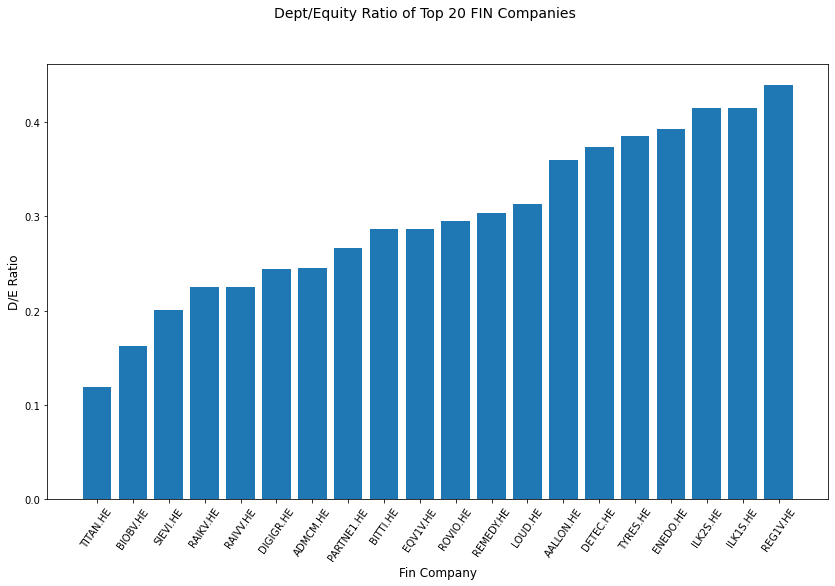

In [12]:
plt.figure(figsize=(14,8))
plt.suptitle('Dept/Equity Ratio of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Fin Company', fontsize=12)
plt.ylabel('D/E Ratio', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_de.index, top_de)
plt.show()

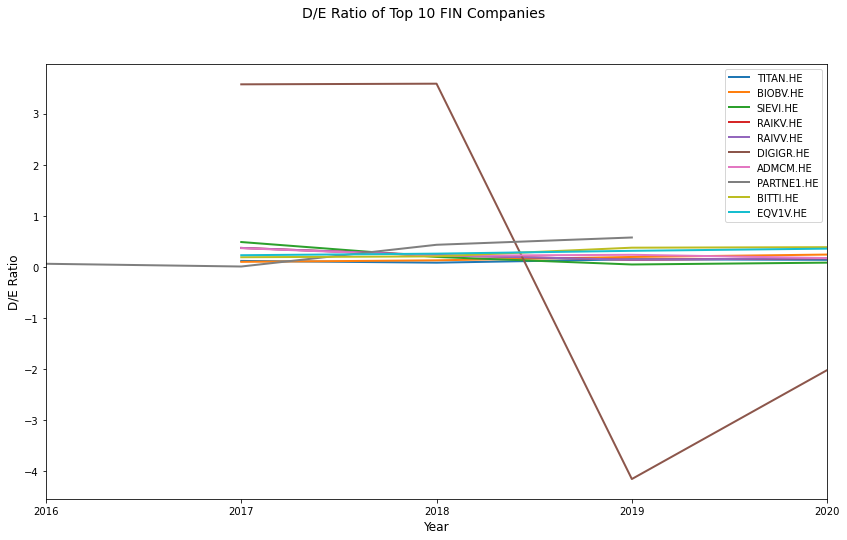

In [13]:
top_10 = top_de.head(10)
de_2 = df[['date', 'company', 'deRatio']]
plt.figure(figsize=(14,8))
for i in top_10.index:
    company = de_2.loc[de_2['company'] == i]
    company = company.sort_values('date')
    company.set_index('date', inplace=True)
    plt.suptitle(f'D/E Ratio of Top 10 FIN Companies', fontsize=14)
    company['deRatio'].plot(label=i, linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('D/E Ratio', fontsize=12)
plt.legend(loc='best')
plt.show()

<h2>Current Ratio</h2>

- Current Ratio = Current Assets/Current Liabilities
- Company's ability to pay short-term obligations
- Should be greater than 1
- Is it managed well?

https://www.investopedia.com/terms/c/currentratio.asp

In [14]:
df['CurrentRatio'] = df['totalCurrentAssets'] / df['totalCurrentLiabilities']

In [15]:
cr = df[['date', 'company', 'CurrentRatio']]
cr

,date,company,CurrentRatio
0,2020,ERIBR.HE,1.310313
1,2019,ERIBR.HE,1.317543
2,2018,ERIBR.HE,1.453081
3,2017,ERIBR.HE,1.541490
4,2020,KNEBV.HE,1.217098
...,...,...,...
682,2017,ENEDO.HE,0.742066
683,2020,NXTMHN0121.HE,1.413764
684,2019,NXTMHN0121.HE,2.070394
685,2018,NXTMHN0121.HE,3.135620


In [16]:
cr = cr.sort_values('CurrentRatio', ascending=False)
cr

,date,company,CurrentRatio
486,2019,SIEVI.HE,118.891055
483,2017,PARTNE1.HE,80.178481
512,2017,SOSI1.HE,26.442378
485,2020,SIEVI.HE,25.720675
634,2017,FELLOW.HE,18.303631
...,...,...,...
622,2017,BONEH.HE,0.065343
303,2018,OMASP.HE,0.063108
302,2019,OMASP.HE,0.059737
673,2017,RUSH.HE,NaN


In [17]:
good_cr = cr.groupby('company')['CurrentRatio'].mean().sort_values(ascending=False)
result_cr = good_cr.loc[good_cr > 1]
# result_cr = good_cr > 1 # If convert to boolean
result_cr.name = "CurrentRatio"
result_cr.to_csv("results/result_cr.csv")
result_cr

company
SIEVI.HE      42.042035
PARTNE1.HE    25.802113
FELLOW.HE     10.498762
TITAN.HE       7.421113
SOSI1.HE       7.417026
                ...    
EXL1V.HE       1.033903
DIGIA.HE       1.027954
MUSTI.HE       1.015478
VALMT.HE       1.007584
SITOWS.HE      1.004467
Name: CurrentRatio, Length: 137, dtype: float64

In [18]:
top_cr = result_cr.head(20)
top_cr

company
SIEVI.HE      42.042035
PARTNE1.HE    25.802113
FELLOW.HE     10.498762
TITAN.HE       7.421113
SOSI1.HE       7.417026
REMEDY.HE      6.639941
BIOBV.HE       6.628713
NANOFH.HE      5.795390
RAIKV.HE       4.478420
RAIVV.HE       4.478420
TAALA.HE       4.126611
RELAIS.HE      4.096273
ADMCM.HE       4.046992
ROVIO.HE       3.902155
ILK1S.HE       3.797225
ILK2S.HE       3.797225
CAPMAN.HE      3.725513
BITTI.HE       3.696001
REG1V.HE       3.445482
HRTIS.HE       3.437299
Name: CurrentRatio, dtype: float64

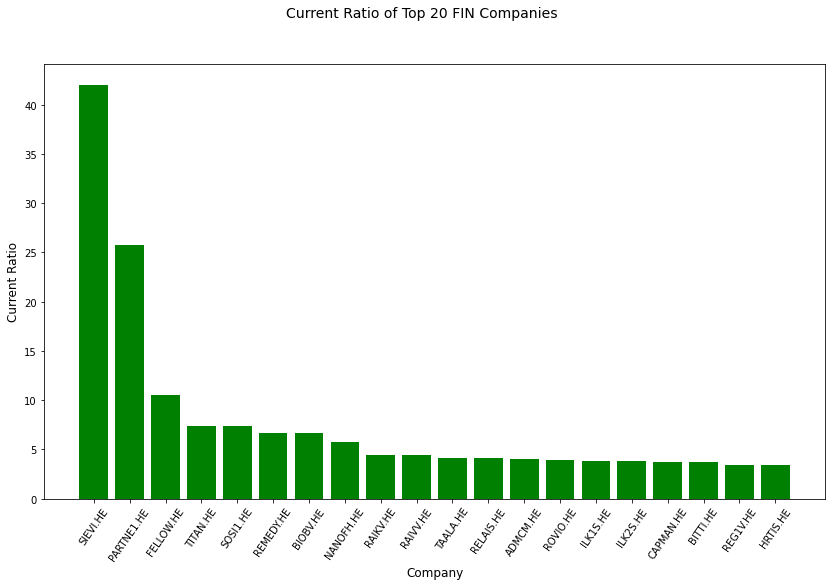

In [19]:
plt.figure(figsize=(14,8))
plt.suptitle('Current Ratio of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Current Ratio', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_cr.index, top_cr, color='green')
plt.show()

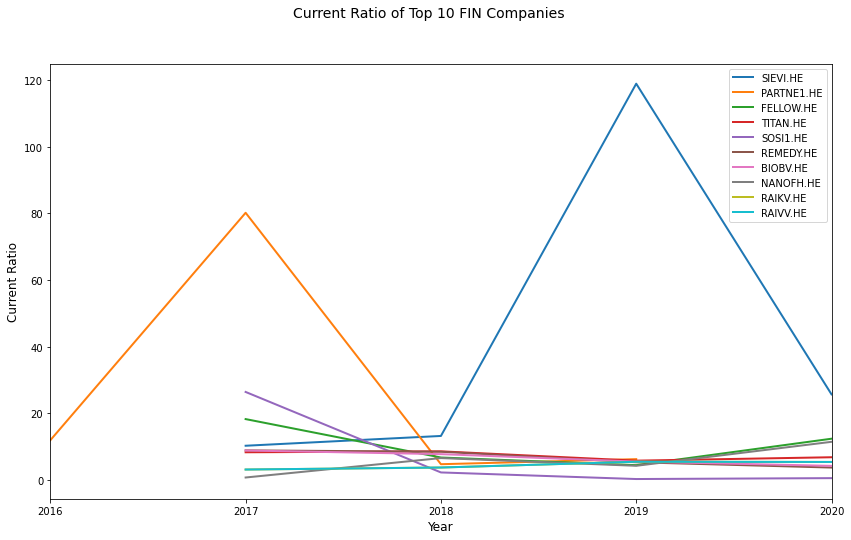

In [20]:
top_10_cr = top_cr.head(10)
cr_2 = df[['date', 'company', 'CurrentRatio']]
plt.figure(figsize=(14,8))
for i in top_10_cr.index:
    company = cr_2.loc[cr_2['company'] == i]
    company = company.sort_values('date')
    company.set_index('date', inplace=True)
    plt.suptitle(f'Current Ratio of Top 10 FIN Companies', fontsize=14)
    company['CurrentRatio'].plot(label=i, linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Current Ratio', fontsize=12)
plt.legend(loc='best')
plt.show()

<h1>Stable and Understandable</h1>

- Return of investment
- Revenue
- Earnings per share
- Book value per share
- Free cash flow

<h2>Return of Investment (ROI)</h2>

- 6% on average over the years
- Should be predictable
- Should be growing

In [21]:
df['roi'] = df['netIncome'] / (df['totalStockholderEquity'] + df['totalLiab'] - df['cash']) * 100

In [22]:
roi = df[['date', 'company', 'roi']]
roi

,date,company,roi
0,2020,ERIBR.HE,7.620687
1,2019,ERIBR.HE,0.958252
2,2018,ERIBR.HE,-2.844324
3,2017,ERIBR.HE,-14.584397
4,2020,KNEBV.HE,11.300006
...,...,...,...
682,2017,ENEDO.HE,-1.662074
683,2020,NXTMHN0121.HE,-148.499445
684,2019,NXTMHN0121.HE,-200.163669
685,2018,NXTMHN0121.HE,-247.468941


In [23]:
roi = roi.sort_values('roi', ascending=False)
roi

,date,company,roi
135,2020,NELES.HE,432.677165
594,2017,CTH1V.HE,262.367865
254,2019,ADMCM.HE,138.309960
255,2018,ADMCM.HE,108.375995
153,2018,REG1V.HE,69.167734
...,...,...,...
674,2016,RUSH.HE,NaN
675,2020,PRIVA.HE,NaN
676,2019,PRIVA.HE,NaN
677,2018,PRIVA.HE,NaN


In [24]:
good_roi = roi.groupby('company')['roi'].mean().sort_values(ascending=False)
result_roi = good_roi.loc[good_roi >= 6]
# result_roi = good_roi >= 6 # If convert to boolean
result_roi.name = "roi"
result_roi.to_csv("results/result_roi.csv")
result_roi

company
NELES.HE      113.016942
ADMCM.HE       85.323208
CTH1V.HE       73.022147
TITAN.HE       47.985817
REG1V.HE       39.899137
REMEDY.HE      30.069910
ROVIO.HE       28.017911
ORNAV.HE       27.663858
ORNBV.HE       27.663858
DETEC.HE       27.644784
FONDIA.HE      25.515647
EQV1V.HE       23.770582
MEKKO.HE       22.813261
ILK2S.HE       20.684310
ILK1S.HE       20.684310
ALMA.HE        18.710442
SIEVI.HE       18.482810
GOFORE.HE      17.143301
ICP1V.HE       16.937712
VINCIT.HE      15.015855
TYRES.HE       13.996340
NESTE.HE       13.530673
KAMUX.HE       13.337392
BILOT.HE       13.173437
PON1V.HE       12.772887
KNEBV.HE       12.166691
PARTNE1.HE     12.073533
ELISA.HE       12.020625
VAIAS.HE       11.971582
TNOM.HE        11.744532
OLVAS.HE       11.502190
BOREO.HE       10.622653
RAUTE.HE       10.065860
SCANFL.HE       9.934508
SIILI.HE        9.394283
ETTE.HE         9.309220
UPONOR.HE       9.297991
AHOLA.HE        9.077321
ACG1V.HE        8.865789
VERK.HE         8

In [25]:
top_roi = result_roi.head(20)
top_roi

company
NELES.HE     113.016942
ADMCM.HE      85.323208
CTH1V.HE      73.022147
TITAN.HE      47.985817
REG1V.HE      39.899137
REMEDY.HE     30.069910
ROVIO.HE      28.017911
ORNAV.HE      27.663858
ORNBV.HE      27.663858
DETEC.HE      27.644784
FONDIA.HE     25.515647
EQV1V.HE      23.770582
MEKKO.HE      22.813261
ILK2S.HE      20.684310
ILK1S.HE      20.684310
ALMA.HE       18.710442
SIEVI.HE      18.482810
GOFORE.HE     17.143301
ICP1V.HE      16.937712
VINCIT.HE     15.015855
Name: roi, dtype: float64

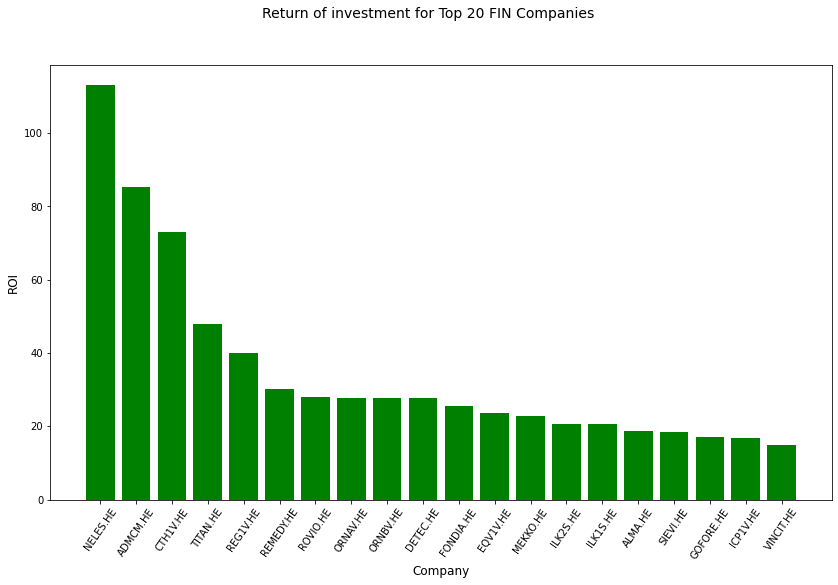

In [26]:
plt.figure(figsize=(14,8))
plt.suptitle('Return of investment for Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_roi.index, top_roi, color='green')
plt.show()

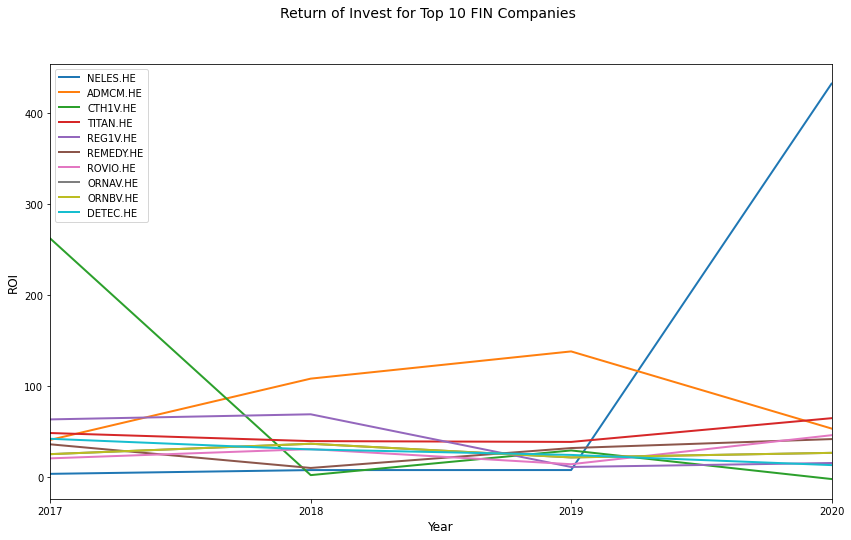

In [27]:
top_10_roi = top_roi.head(10)
roi_2 = df[['date', 'company', 'roi']]
plt.figure(figsize=(14,8))
for i in top_10_roi.index:
    company = roi_2.loc[roi_2['company'] == i]
    company = company.sort_values('date')
    company.set_index('date', inplace=True)
    plt.suptitle(f'Return of Invest for Top 10 FIN Companies', fontsize=14)
    company['roi'].plot(label=i, linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.legend(loc='best')
plt.show()

<h2>Revenue</h2>

- Income generated from normal business operations and includes discounts and deductions for returned merchandise
- It is the top line or gross income figure from which costs are subtracted to determine net income
- Looking for growth

https://www.investopedia.com/terms/r/revenue.asp

In [28]:
rev = df[['date', 'company', 'totalRevenue']]
rev

,date,company,totalRevenue
0,2020,ERIBR.HE,232390000000
1,2019,ERIBR.HE,227216000000
2,2018,ERIBR.HE,210838000000
3,2017,ERIBR.HE,205378000000
4,2020,KNEBV.HE,9938500000
...,...,...,...
682,2017,ENEDO.HE,69975000
683,2020,NXTMHN0121.HE,4154517
684,2019,NXTMHN0121.HE,3386990
685,2018,NXTMHN0121.HE,2733569


In [29]:
rev = rev.sort_values('totalRevenue', ascending=False)
rev

,date,company,totalRevenue
0,2020,ERIBR.HE,232390000000
1,2019,ERIBR.HE,227216000000
2,2018,ERIBR.HE,210838000000
3,2017,ERIBR.HE,205378000000
32,2020,TELIA1.HE,89191000000
...,...,...,...
356,2020,FARON.HE,0
535,2018,AALLON.HE,0
508,2018,VIAFIN.HE,0
619,2020,BONEH.HE,0


In [30]:
good_rev = rev.groupby('company')['totalRevenue'].mean().sort_values(ascending=False)
good_rev

company
ERIBR.HE     2.189555e+11
TELIA1.HE    8.462625e+10
SSABBH.HE    7.072025e+10
SSABAH.HE    7.072025e+10
NOKIA.HE     2.271925e+10
                 ...     
FARON.HE     4.262500e+05
NANOFH.HE    3.794332e+05
LOUD.HE      1.221070e+05
HRTIS.HE     0.000000e+00
BONEH.HE     0.000000e+00
Name: totalRevenue, Length: 174, dtype: float64

In [31]:
top_rev = good_rev.head(20)

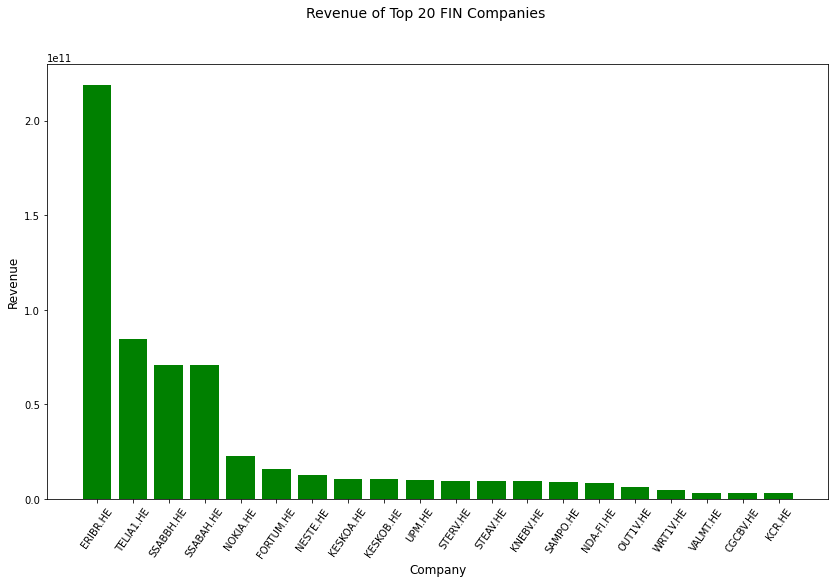

In [32]:
plt.figure(figsize=(14,8))
plt.suptitle('Revenue of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_rev.index, top_rev, color='green')
plt.show()

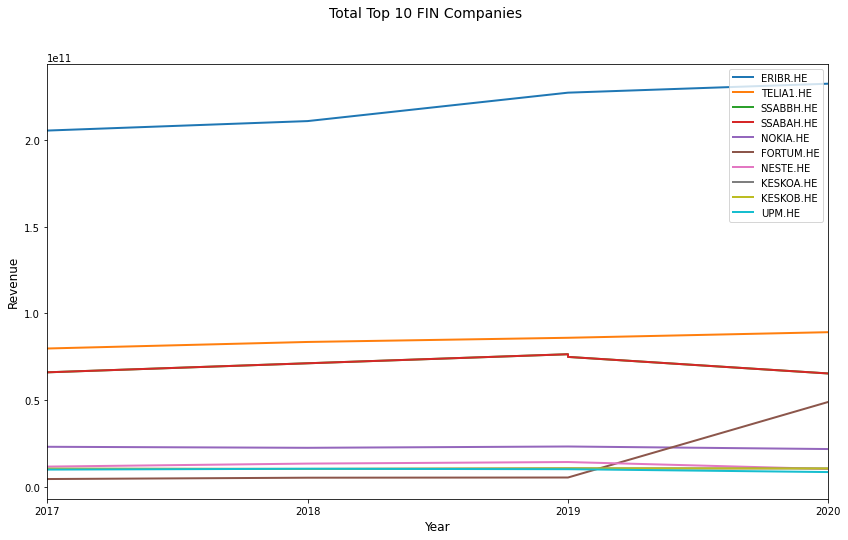

In [33]:
top_10_rev = top_rev.head(10)
rev_2 = df[['date', 'company', 'totalRevenue']]
plt.figure(figsize=(14,8))
for i in top_10_rev.index:
    company = rev_2.loc[rev_2['company'] == i]
    company = company.sort_values('date')
    company.set_index('date', inplace=True)
    plt.suptitle(f'Total Top 10 FIN Companies', fontsize=14)
    company['totalRevenue'].plot(label=i, linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend(loc='best')
plt.show()

<h2>Compound Annual Growth Rate (CAGR)</h2>

- Rate of return that would be required for an investment to grow from its beginning balance to its ending balance
- Assuming the profits were reinvested at the end of each year of the investment’s lifespan

https://www.investopedia.com/terms/c/cagr.asp

In [34]:
rev_3 = df[['date', 'company', 'totalRevenue']]
rev_start = rev_3.loc[rev_3['date'] == '2017'].reset_index()
rev_current = rev_3.loc[rev_3['date'] == '2020'].reset_index()

for i, row in rev_start.iterrows():
    revenue = row['totalRevenue']
#     print(revenue)
    rev_current.at[i, 'startRevenue'] = revenue
    
for i, row in rev_current.iterrows():
    try:
        growth = (row['totalRevenue'] / row['startRevenue']) ** (1/3) - 1
    #     print(growth)
        rev_current.at[i, 'CAGR'] = growth
    except ZeroDivisionError:
        pass
    
rev_current = rev_current[['company', 'CAGR']]
rev_current.to_csv("results/result_rev.csv")
rev_current

,company,CAGR
0,ERIBR.HE,0.042048
1,KNEBV.HE,0.041519
2,NESTE.HE,-0.040701
3,NDA-FI.HE,-0.060413
4,SAMPO.HE,0.032109
...,...,...
162,NORDID.HE,0.358830
163,PIIPPO.HE,NaN
164,PRIVA.HE,NaN
165,ENEDO.HE,NaN


In [35]:
cagr = rev_current.sort_values('CAGR', ascending=False)
cagr

,company,CAGR
63,SCANFL.HE,12.434663
121,IFA1V.HE,8.466201
46,YIT.HE,2.793886
85,TAALA.HE,2.586379
58,LAT1V.HE,2.524903
...,...,...
147,AVIDLY.HE,NaN
163,PIIPPO.HE,NaN
164,PRIVA.HE,NaN
165,ENEDO.HE,NaN


In [36]:
good_cagr = cagr.groupby('company')['CAGR'].sum().sort_values(ascending=False)
good_cagr

company
SCANFL.HE    12.434663
IFA1V.HE      8.466201
YIT.HE        2.793886
TAALA.HE      2.586379
LAT1V.HE      2.524903
               ...    
QTCOM.HE     -0.767916
LOUD.HE      -0.773220
HRTIS.HE     -1.000000
FARON.HE     -1.000000
BONEH.HE     -1.000000
Name: CAGR, Length: 167, dtype: float64

In [37]:
top_cagr = good_cagr.head(20)

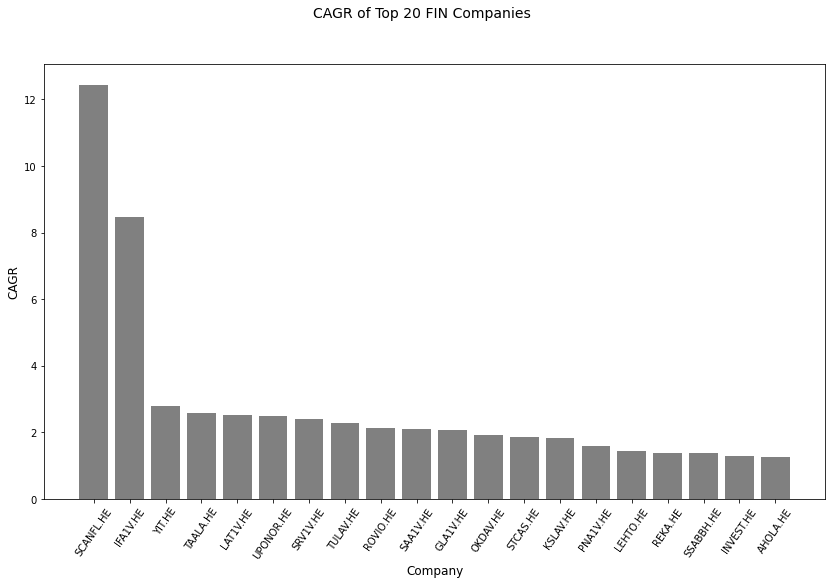

In [38]:
plt.figure(figsize=(14,8))
plt.suptitle('CAGR of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('CAGR', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_cagr.index, top_cagr, color='gray')
plt.show()

<h2>Earnings/Share (EPS)</h2>

- An indicator of a company's profitability
- The higher a company's EPS, the more profitable it is considered to be

https://www.investopedia.com/terms/e/eps.asp

In [39]:
df['EPS'] = (df['netIncome'] - df['dividendsPaid']) / df['netIncomeApplicableToCommonShares']

In [40]:
eps = df[['date', 'company', 'EPS']]
eps

,date,company,EPS
0,2020,ERIBR.HE,1.285134
1,2019,ERIBR.HE,2.484930
2,2018,ERIBR.HE,0.496631
3,2017,ERIBR.HE,0.899527
4,2020,KNEBV.HE,1.937500
...,...,...,...
682,2017,ENEDO.HE,NaN
683,2020,NXTMHN0121.HE,NaN
684,2019,NXTMHN0121.HE,NaN
685,2018,NXTMHN0121.HE,NaN


In [41]:
eps = eps.sort_values('EPS', ascending=False)
eps

,date,company,EPS
25,2019,NOKIA.HE,81.000000
16,2020,SAMPO.HE,23.513514
156,2019,CTY1S.HE,17.541667
314,2019,SUY1V.HE,13.782222
111,2020,CGCBV.HE,10.543210
...,...,...,...
682,2017,ENEDO.HE,NaN
683,2020,NXTMHN0121.HE,NaN
684,2019,NXTMHN0121.HE,NaN
685,2018,NXTMHN0121.HE,NaN


In [42]:
good_eps = eps.groupby('company')['EPS'].mean().sort_values(ascending=False)
good_eps

company
NOKIA.HE    20.029337
SAMPO.HE     7.338776
CTY1S.HE     6.552461
FSC1V.HE     5.144704
SUY1V.HE     3.921218
              ...    
SOSI1.HE          NaN
TEM1V.HE          NaN
TULAV.HE          NaN
UUTEC.HE          NaN
VALOE.HE          NaN
Name: EPS, Length: 174, dtype: float64

In [43]:
top_eps = good_eps.head(20)

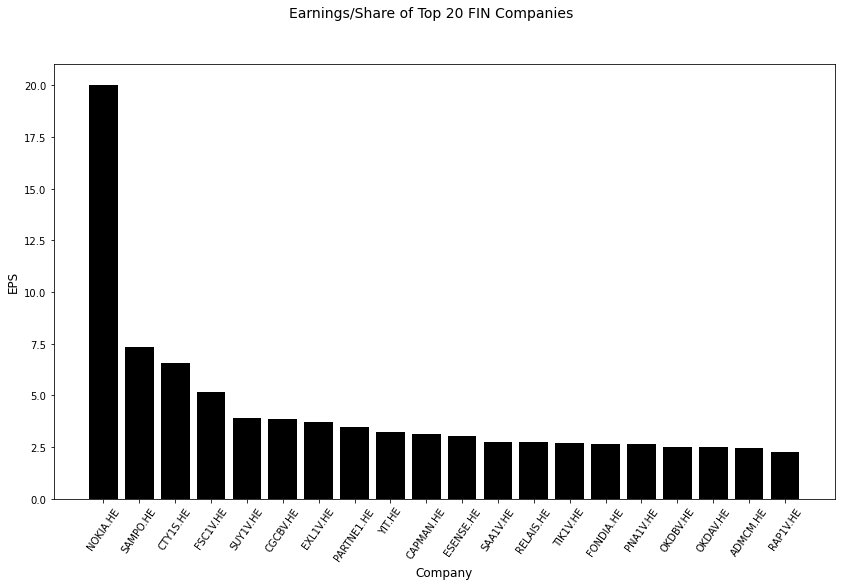

In [44]:
plt.figure(figsize=(14,8))
plt.suptitle('Earnings/Share of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('EPS', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_eps.index, top_eps, color='black')
plt.show()

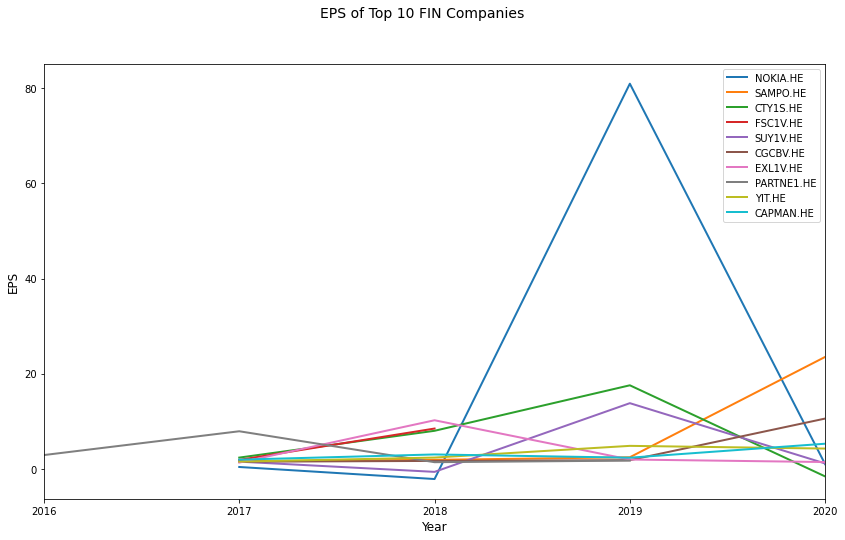

In [45]:
top_10_eps = top_eps.head(10)
eps_2 = df[['date', 'company', 'EPS']]
plt.figure(figsize=(14,8))
for i in top_10_eps.index:
    company = eps_2.loc[eps_2['company'] == i]
    company = company.sort_values('date')
    company.set_index('date', inplace=True)
    plt.suptitle(f'EPS of Top 10 FIN Companies', fontsize=14)
    company['EPS'].plot(label=i, linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EPS', fontsize=12)
plt.legend(loc='best')
plt.show()

<h2>Earnings/Share Growth</h2>

- Ensure growth in revenue gives growth in earnings
- Looking for growth rate in years

In [46]:
eps_3 = df[['date', 'company', 'EPS']]
eps_start = eps_3.loc[eps_3['date'] == '2017'].reset_index()
eps_current = eps_3.loc[eps_3['date'] == '2020'].reset_index()
eps_start.EPS = eps_start['EPS'].round(decimals=5)
# eps_start.EPS.dtype

for i, row in eps_start.iterrows():
    eps_row = row['EPS']
#     print(type(eps_row))
    eps_current.at[i, 'startEPS'] = eps_row

for i, row in eps_current.iterrows():
    eps_growth = (row['EPS'] / row['startEPS']) ** (1/3) - 1
    if isinstance(eps_growth, complex):
        # Take only real part of complex number
        eps_growth = eps_growth.real
#     print(type(eps_growth))
    eps_current.at[i, 'EPSG'] = eps_growth
    
eps_current = eps_current[['company', 'EPSG']]
eps_current.to_csv("results/result_eps.csv")
eps_current

,company,EPSG
0,ERIBR.HE,0.126275
1,KNEBV.HE,0.018805
2,NESTE.HE,0.154525
3,NDA-FI.HE,-0.181264
4,SAMPO.HE,1.459560
...,...,...
162,NORDID.HE,NaN
163,PIIPPO.HE,NaN
164,PRIVA.HE,NaN
165,ENEDO.HE,NaN


In [47]:
epsg = eps_current.sort_values('EPSG', ascending=False)
epsg

,company,EPSG
4,SAMPO.HE,1.459560
28,CGCBV.HE,1.361832
148,ACG1V.HE,0.583825
103,SIILI.HE,0.501660
69,CAPMAN.HE,0.495122
...,...,...
162,NORDID.HE,NaN
163,PIIPPO.HE,NaN
164,PRIVA.HE,NaN
165,ENEDO.HE,NaN


In [48]:
good_epsg = epsg.groupby('company')['EPSG'].sum().sort_values(ascending=False)
good_epsg

company
SAMPO.HE      1.459560
CGCBV.HE      1.361832
ACG1V.HE      0.583825
SIILI.HE      0.501660
CAPMAN.HE     0.495122
                ...   
TELIA1.HE    -0.332547
FODELIA.HE   -0.354122
ROVIO.HE     -0.377423
CTY1S.HE     -0.488139
STCAS.HE     -0.502066
Name: EPSG, Length: 167, dtype: float64

In [49]:
top_epsg = good_epsg.head(20)

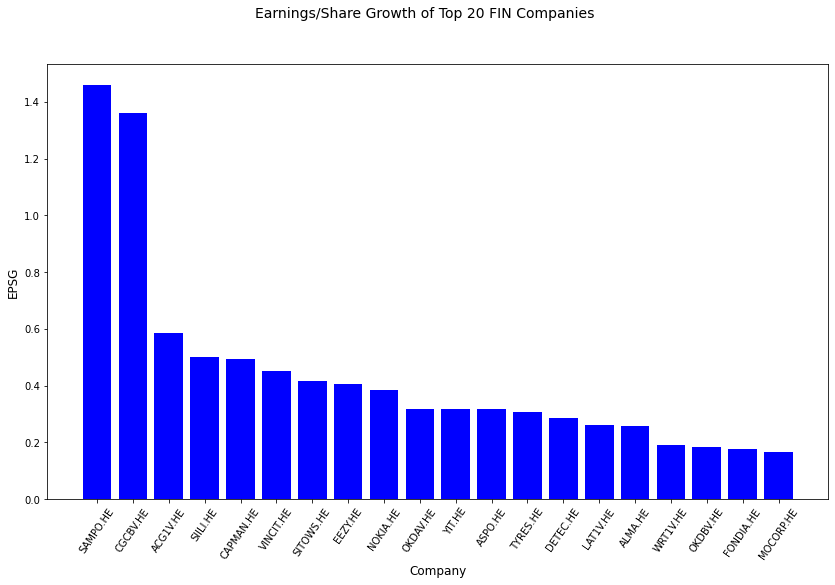

In [50]:
plt.figure(figsize=(14,8))
plt.suptitle('Earnings/Share Growth of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('EPSG', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_epsg.index, top_epsg, color='blue')
plt.show()

<h2>Book Value</h2>

- Equal to the cost of carrying an asset on a company's balance sheet

https://www.investopedia.com/terms/b/bookvalue.asp

In [51]:
df['bookValue'] = df['totalAssets'] - df['totalLiab']

In [52]:
df.bookValue

0      8.517700e+10
1      8.187800e+10
2      8.777000e+10
3      9.757100e+10
4      3.197200e+09
           ...     
682    7.011000e+06
683   -1.469136e+06
684   -7.400650e+05
685   -2.942750e+05
686    5.520785e+06
Name: bookValue, Length: 687, dtype: float64

<h2>Book Value/Share (BVPS)</h2>

- If sell today, what is left to every share
- Ensure growth of book value
- Best indicator of growth of value

In [53]:
# def get_outstanding_shares():
#     shares = {}
#     max_try = 5
#     for n in range(len(FIN[0:1])):
#         attemp = 0
#         while attemp < max_try:
#             try:
#                 yf = YahooFinancials(FIN[n])
#                 data = yf.get_num_shares_outstanding(price_type='current')
#                 shares[FIN[n]] = data
#                 print(f"FIN_{n}")
#             except IncompleteRead:
#                 attemp += 1
#                 sleep(10)
#             else:
#                 break
                                
#     df_shares = pd.DataFrame.from_dict(shares, orient='index')
#     df_shares.columns = ['sharesOutstanding']
#     df_shares.to_csv("results/shares_outstanding.csv")                

In [54]:
# get_outstanding_shares()

In [55]:
df['outstandingShares'] = abs(df['issuanceOfStock'] - df['treasuryStock'])

# # book value per share, which is the book value divided by the total number of outstanding shares
# df['BVPS'] = df['bookValue'] / df['outstandingShares']

# The formula for calculating book value per share is the total common stockholders' equity less the preferred stock,
# divided by the number of common shares of the company.
df['BVPS'] = (df['totalStockholderEquity'] - df['commonStock']) / df['outstandingShares']
df.BVPS.unique()

array([ 2.45448808e+01,  3.14496420e+01,  8.19417249e+01,  1.79559284e+02,
                   nan,  3.23952033e+01,  8.51875000e+01,  7.38847118e+01,
        1.04326996e+02,  3.84600000e+02,  1.88580687e+01,  9.60109778e-01,
        1.11156187e+00, -6.48535565e-01,  2.64287879e+01,  8.41902017e+00,
        9.56896552e+00,  2.44691489e+02,  1.27124519e+01,  2.58505998e+00,
        1.74879457e+00,  9.55480646e-01,  9.32342630e-01,  2.13816926e+00,
        1.16712892e+00,  1.30908868e+00,  1.38046498e+00,  1.14018458e+00,
        1.31097313e+00,  8.56761463e+00,  1.81476739e+00,  1.52449650e+00,
        2.62239716e+00,  3.31454974e+00,  2.86754967e+00,  4.02549020e+00,
        3.37500000e+00,  2.95409951e+00,  4.69680320e+00,  5.41511224e+00,
        4.46240767e+00,  4.38981563e+00,  3.22689076e+00,  2.82043344e+00,
        3.30433186e+00,  1.85242978e+00,  1.16251677e+00,  1.12916241e+00,
        2.36149188e+00,  2.14280587e+00,  1.88305198e+00,  1.76076506e+00,
        3.98571429e+00,  

In [56]:
bvps = df[['date', 'company', 'BVPS']]
bvps

,date,company,BVPS
0,2020,ERIBR.HE,24.544881
1,2019,ERIBR.HE,31.449642
2,2018,ERIBR.HE,81.941725
3,2017,ERIBR.HE,179.559284
4,2020,KNEBV.HE,NaN
...,...,...,...
682,2017,ENEDO.HE,-0.341745
683,2020,NXTMHN0121.HE,-0.033614
684,2019,NXTMHN0121.HE,-0.020771
685,2018,NXTMHN0121.HE,-0.009717


In [57]:
bvps = bvps.sort_values('BVPS', ascending=False)
bvps

,date,company,BVPS
482,2018,PARTNE1.HE,142787.193182
484,2016,PARTNE1.HE,1146.156033
556,2019,OVARO.HE,466.316832
14,2018,NDA-FI.HE,384.600000
248,2017,ROVIO.HE,368.477573
...,...,...,...
673,2017,RUSH.HE,NaN
674,2016,RUSH.HE,NaN
675,2020,PRIVA.HE,NaN
679,2020,ENEDO.HE,NaN


In [58]:
good_bvps = bvps.groupby('company')['BVPS'].mean().sort_values(ascending=False)
good_bvps.to_csv("results/result_bvps.csv")
good_bvps

company
PARTNE1.HE    71966.674607
OVARO.HE        265.707921
NDA-FI.HE       169.261688
MEKKO.HE        130.237612
KOJAMO.HE       128.701971
                  ...     
VALMT.HE               NaN
VERK.HE                NaN
VIK1V.HE               NaN
WRT1V.HE               NaN
WUF1V.HE               NaN
Name: BVPS, Length: 174, dtype: float64

In [59]:
# bvps_3 = df.copy()
# bvps_3 = df[['date', 'company', 'BVPS']]
# bvps_start = bvps_3.loc[bvps_3['date'] == '2017'].reset_index()
# bvps_current = bvps_3.loc[bvps_3['date'] == '2020'].reset_index()
# bvps_start.BVPS = bvps_start['BVPS'].round(decimals=5)

# for i, row in bvps_start.iterrows():
#     bvps_row = row['BVPS']
# #     print(type(eps_row))
#     bvps_current.at[i, 'startBVPS'] = bvps_row

# for i, row in bvps_current.iterrows():
#     bvps_growth = (row['BVPS'] / row['startBVPS']) ** (1/3) - 1
#     if isinstance(bvps_growth, complex):
#         # Take only real part of complex number
#         bvps_growth = bvps_growth.real
# #     print(type(eps_growth))
#     bvps_current.at[i, 'BVPS'] = bvps_growth
    
# bvps_current = bvps_current[['company', 'BVPS']]
# bvps_current.to_csv("results/result_bvps.csv")
# bvps_current

In [60]:
top_bvps = good_bvps.head(20)
top_bvps

company
PARTNE1.HE    71966.674607
OVARO.HE        265.707921
NDA-FI.HE       169.261688
MEKKO.HE        130.237612
KOJAMO.HE       128.701971
ROVIO.HE        106.609396
REMEDY.HE        80.317654
ERIBR.HE         79.373883
KNEBV.HE         63.822472
ASPO.HE          60.335273
NANOFH.HE        31.057000
RELAIS.HE        21.118894
APETIT.HE        20.476233
SCANFL.HE        18.814150
TYRES.HE         14.805591
KAMUX.HE         14.700000
GOFORE.HE        13.642985
ICP1V.HE          9.764490
RAP1V.HE          9.681649
NORDID.HE         8.997787
Name: BVPS, dtype: float64

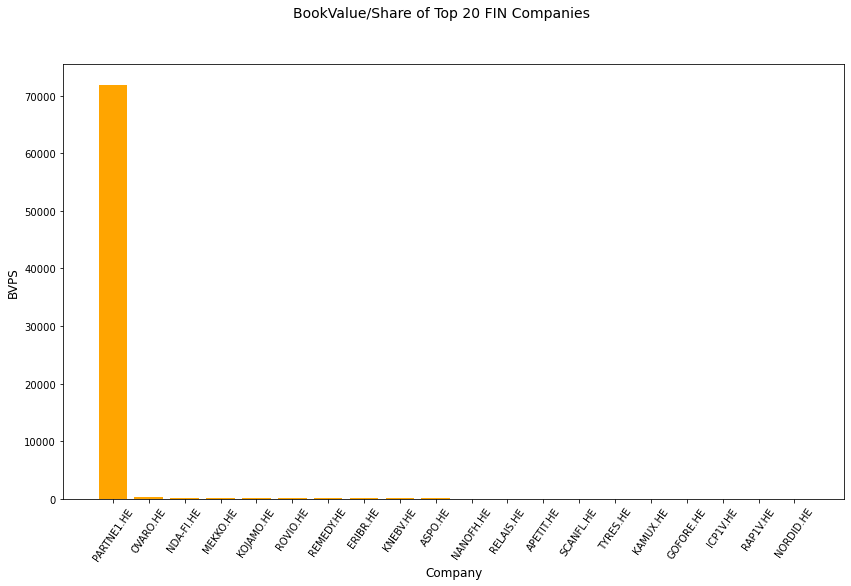

In [61]:
plt.figure(figsize=(14,8))
plt.suptitle('BookValue/Share of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('BVPS', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_bvps.index, top_bvps, color='orange')
plt.show()

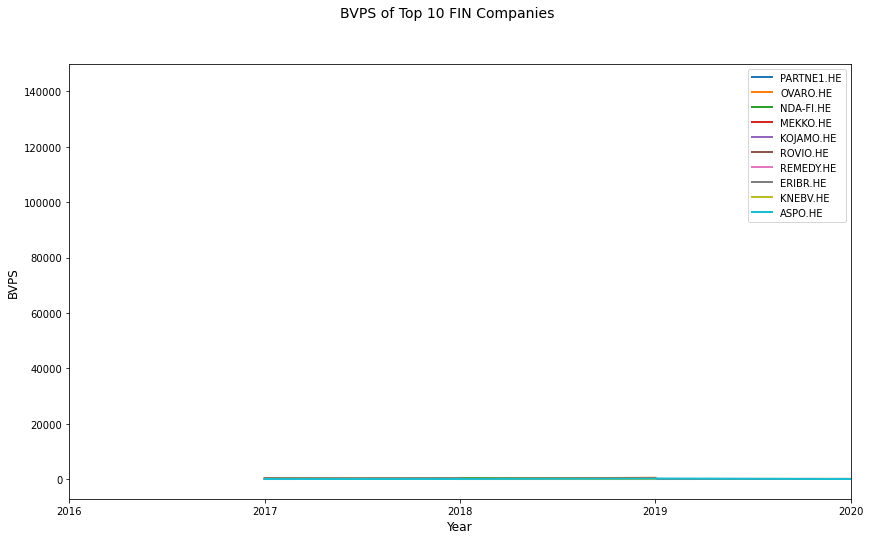

In [62]:
top_10_bvps = top_bvps.head(10)
bvps_2 = df[['date', 'company', 'BVPS']]
plt.figure(figsize=(14,8))
for i in top_10_bvps.index:
    company = bvps_2.loc[bvps_2['company'] == i]
    company = company.sort_values('date')
    company.set_index('date', inplace=True)
    plt.suptitle(f'BVPS of Top 10 FIN Companies', fontsize=14)
    company['BVPS'].plot(label=i, linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('BVPS', fontsize=12)
plt.legend(loc='best')
plt.show()

<h2>Free Cash Flow (FCF)</h2>

- Free cash flow is the cash left over after a company pays for its operating expenses and capital expenditures (CapEx)
- What is lef to grow the company

https://www.investopedia.com/ask/answers/033015/what-formula-calculating-free-cash-flow.asp


In [63]:
df['FCF'] = df['totalCashFromOperatingActivities'] - df['capitalExpenditures']
df['FCF']

0      3.334800e+10
1      2.191000e+10
2      1.331700e+10
3      1.347800e+10
4      1.638200e+09
           ...     
682    9.957000e+06
683             NaN
684   -5.838201e+06
685   -5.581702e+06
686   -5.255101e+06
Name: FCF, Length: 687, dtype: float64

In [64]:
fcf = df[['date', 'company', 'FCF']]
fcf

,date,company,FCF
0,2020,ERIBR.HE,3.334800e+10
1,2019,ERIBR.HE,2.191000e+10
2,2018,ERIBR.HE,1.331700e+10
3,2017,ERIBR.HE,1.347800e+10
4,2020,KNEBV.HE,1.638200e+09
...,...,...,...
682,2017,ENEDO.HE,9.957000e+06
683,2020,NXTMHN0121.HE,NaN
684,2019,NXTMHN0121.HE,-5.838201e+06
685,2018,NXTMHN0121.HE,-5.581702e+06


In [65]:
fcf = fcf.sort_values('FCF', ascending=False)
fcf

,date,company,FCF
33,2019,TELIA1.HE,4.281800e+10
32,2020,TELIA1.HE,4.253400e+10
34,2018,TELIA1.HE,4.149000e+10
35,2017,TELIA1.HE,3.924400e+10
0,2020,ERIBR.HE,3.334800e+10
...,...,...,...
675,2020,PRIVA.HE,NaN
676,2019,PRIVA.HE,NaN
677,2018,PRIVA.HE,NaN
678,2017,PRIVA.HE,NaN


In [66]:
good_fcf = fcf.groupby('company')['FCF'].mean().sort_values(ascending=False)
good_fcf

company
TELIA1.HE    4.152150e+10
ERIBR.HE     2.051325e+10
SSABAH.HE    8.056000e+09
SSABBH.HE    8.056000e+09
NDA-FI.HE    3.915750e+09
                 ...     
CTY1S.HE              NaN
HRTIS.HE              NaN
KOJAMO.HE             NaN
OVARO.HE              NaN
PRIVA.HE              NaN
Name: FCF, Length: 174, dtype: float64

In [67]:
top_fcf = good_fcf.head(20)

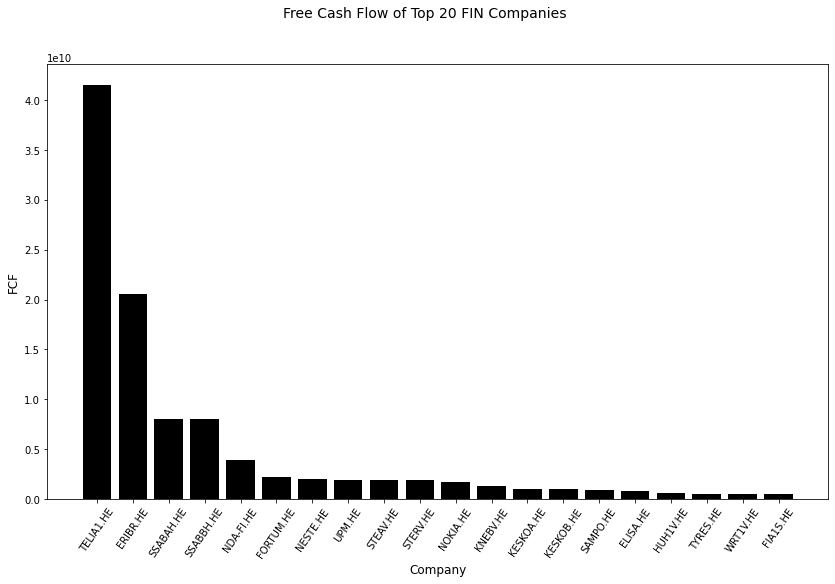

In [68]:
plt.figure(figsize=(14,8))
plt.suptitle('Free Cash Flow of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('FCF', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_fcf.index, top_fcf, color='black')
plt.show()

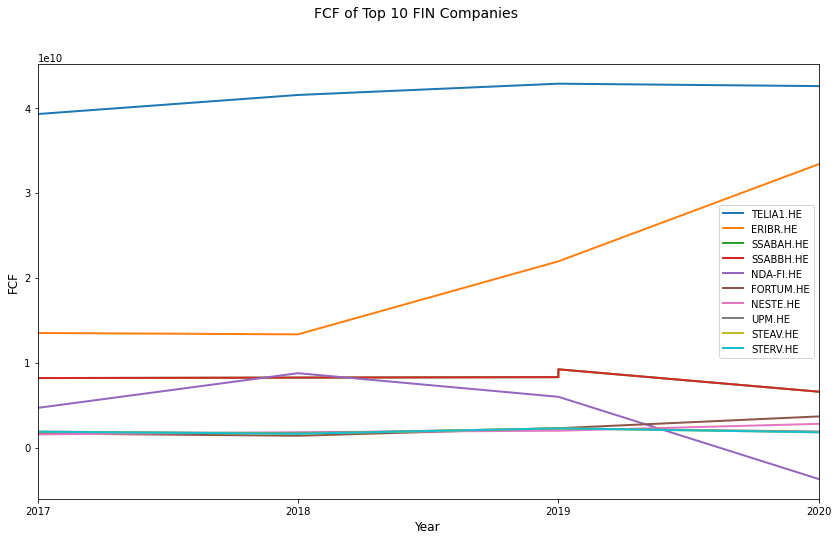

In [69]:
top_10_fcf = top_fcf.head(10)
fcf_2 = df[['date', 'company', 'FCF']]
plt.figure(figsize=(14,8))
for i in top_10_fcf.index:
    company = fcf_2.loc[fcf_2['company'] == i]
    company = company.sort_values('date')
    company.set_index('date', inplace=True)
    plt.suptitle(f'FCF of Top 10 FIN Companies', fontsize=14)
    company['FCF'].plot(label=i, linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('FCF', fontsize=12)
plt.legend(loc='best')
plt.show()

<h3>Free Cash Flow Growth</h3>

In [70]:
fcf_3 = df[['date', 'company', 'FCF']]
fcf_start = fcf_3.loc[fcf_3['date'] == '2017'].reset_index()
fcf_current = fcf_3.loc[fcf_3['date'] == '2020'].reset_index()
fcf_start.FCF = fcf_start['FCF'].round(decimals=5)

for i, row in fcf_start.iterrows():
    fcf_row = row['FCF']
#     print(fcf_row)
    fcf_current.at[i, 'startFCF'] = fcf_row

for i, row in fcf_current.iterrows():
    fcf_growth = (row['FCF'] / row['startFCF']) ** (1/3) - 1
    if isinstance(fcf_growth, complex):
        # Take only real part of complex number
        fcf_growth = fcf_growth.real
#     print(fcf_growth)
    fcf_current.at[i, 'FCFG'] = fcf_growth
    
fcf_current = fcf_current[['company', 'FCFG']]
fcf_current.to_csv("results/result_fcf.csv")
fcf_current

,company,FCFG
0,ERIBR.HE,0.352534
1,KNEBV.HE,0.151407
2,NESTE.HE,0.217930
3,NDA-FI.HE,-0.536581
4,SAMPO.HE,-0.104980
...,...,...
162,NORDID.HE,-0.751235
163,PIIPPO.HE,NaN
164,PRIVA.HE,NaN
165,ENEDO.HE,NaN


In [71]:
fcfg = fcf_current.sort_values('FCFG', ascending=False)
fcfg

,company,FCFG
76,OMASP.HE,2.903591
67,ALBBV.HE,2.151698
37,UPONOR.HE,2.085365
115,STCAS.HE,1.711483
89,DIGIA.HE,1.670624
...,...,...
161,SAVOH.HE,NaN
163,PIIPPO.HE,NaN
164,PRIVA.HE,NaN
165,ENEDO.HE,NaN


In [72]:
good_fcfg = fcfg.groupby('company')['FCFG'].mean().sort_values(ascending=False)
good_fcfg

company
OMASP.HE     2.903591
ALBBV.HE     2.151698
UPONOR.HE    2.085365
STCAS.HE     1.711483
DIGIA.HE     1.670624
               ...   
REG1V.HE          NaN
SAGCV.HE          NaN
SAVOH.HE          NaN
TYRES.HE          NaN
VALOE.HE          NaN
Name: FCFG, Length: 167, dtype: float64

In [73]:
top_fcfg = good_fcfg.head(20)

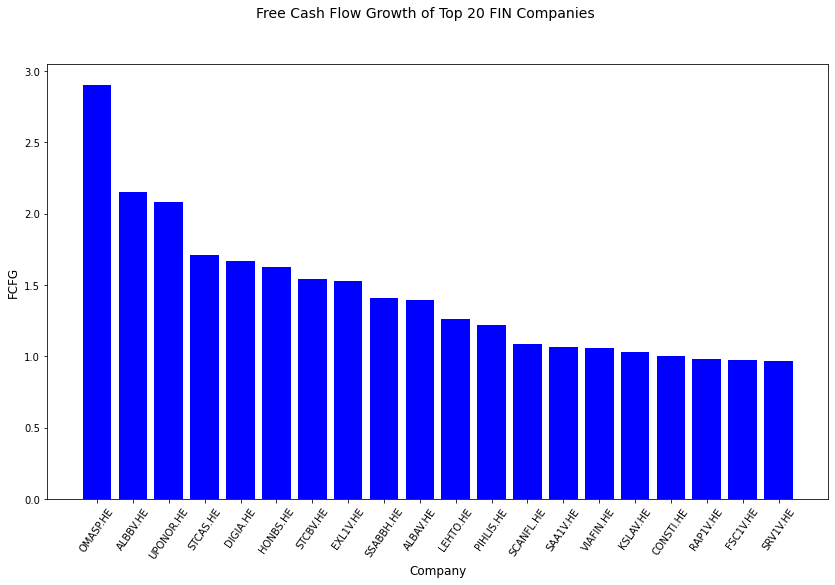

In [74]:
plt.figure(figsize=(14,8))
plt.suptitle('Free Cash Flow Growth of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('FCFG', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_fcfg.index, top_fcfg, color='blue')
plt.show()

<h2>Earnings/Share (EPS)</h2>

- Earnings per share (EPS) is calculated as a company's profit divided by the outstanding shares of its common stock
- The resulting number serves as an indicator of a company's profitability

https://www.investopedia.com/terms/e/eps.asp

In [75]:
current_eps = pd.read_csv("results/current_eps.csv", index_col=0)
current_eps.reset_index(inplace=True)
current_eps

,index,Current EPS
0,ERIBR.HE,NaN
1,KNEBV.HE,1.810
2,NESTE.HE,0.928
3,NDA-FI.HE,0.550
4,SAMPO.HE,0.067
...,...,...
172,RUSH.HE,NaN
173,PRIVA.HE,NaN
174,ENEDO.HE,NaN
175,NXTMHN0121.HE,NaN


In [76]:
good_eps = current_eps.groupby('index')['Current EPS'].sum().sort_values(ascending=False)
good_eps

index
ORTHEX.HE    19.375001
NELES.HE     14.635999
SITOWS.HE     9.630000
FORTUM.HE     2.050000
ELISA.HE      2.049000
               ...    
HEALTH.HE     0.000000
HKSAV.HE      0.000000
HRTIS.HE      0.000000
RAUTE.HE      0.000000
FIA1S.HE      0.000000
Name: Current EPS, Length: 177, dtype: float64

In [77]:
top_eps = good_eps.head(20)

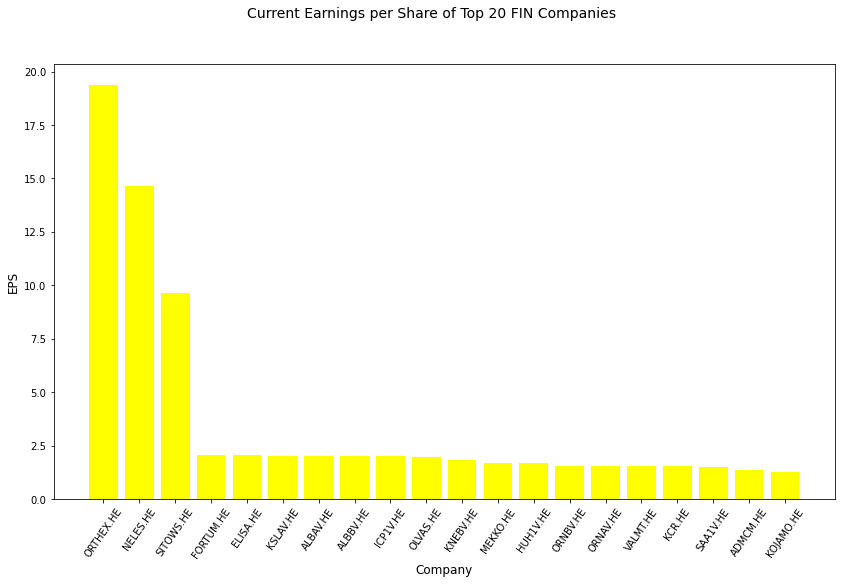

In [78]:
plt.figure(figsize=(14,8))
plt.suptitle('Current Earnings per Share of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('EPS', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_eps.index, top_eps, color='yellow')
plt.show()

<h2>Price-to-Earnings (PE) ratio</h2>

- P/E Ratio = Price / EPS
- High P/E -> Business is excepted to grow fast
- Low P/E -> Business is not excepted to grow much
- Number is industry dependent

https://www.investopedia.com/terms/p/price-earningsratio.asp

In [79]:
current_pe_ratio = pd.read_csv("results/current_pe_ratio.csv", index_col=0)
current_pe_ratio = current_pe_ratio.reset_index()

In [80]:
good_pe = current_pe_ratio.groupby('index')['Current PE Ratio'].sum().sort_values(ascending=False)
good_pe

index
HEEROS.HE    1416.00000
LEADD.HE      647.50000
SAMPO.HE      602.53730
CGCBV.HE      362.38095
EAB.HE        202.22224
                ...    
LEHTO.HE        0.00000
STCAS.HE        0.00000
PNA1V.HE        0.00000
ENEDO.HE        0.00000
ERIBR.HE        0.00000
Name: Current PE Ratio, Length: 177, dtype: float64

In [81]:
top_pe = good_pe.head(20)

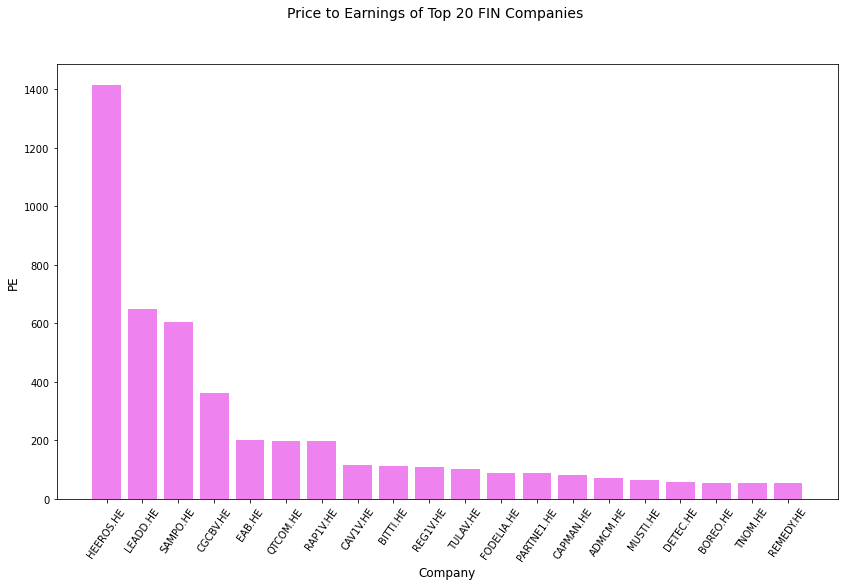

In [82]:
plt.figure(figsize=(14,8))
plt.suptitle('Price to Earnings of Top 20 FIN Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('PE', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
plt.bar(top_pe.index, top_pe, color='violet')
plt.show()

<h2>Current Price</h2>

In [83]:
current_price = pd.read_csv("results/current_price.csv", index_col=0)
current_price = current_price.reset_index()
current_price

,index,Current Price
0,ROVIO.HE,6.995
